In [8]:
import aster.timeline 
import datetime
import pandas
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("whitegrid")
seaborn.despine()
%matplotlib inline
%config InlineBackend.figure_formats = {'svg',}

In [9]:
# Create the init section
factory = aster.timeline.TimeLineFactory('timeline.xlsx', existing_timeline='init_timeline.xlsx')

# Simulation start and end dates
date_format = '%Y-%m-%d %H:%M:%S'
start = datetime.datetime.strptime('2025-07-17 12:00:00', date_format)
end = datetime.datetime.strptime('2075-07-30 12:00:00', date_format)

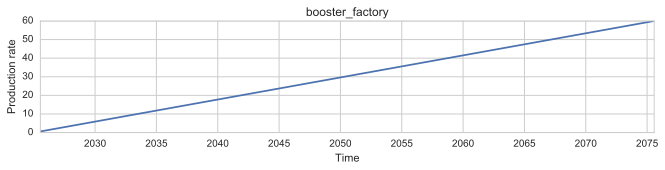

In [10]:
# booster_factory
dates = [start, end]
values = [0.6, 60]
timeserie = factory.interpolate_timeserie(dates, values, 'B')
factory.add_to_timeline(timeserie, 'earth', 'update', 'booster_factory', 'production', 'unit')

plt.figure(figsize=(11, 2))
plt.title('booster_factory')
plt.plot(timeserie['datetime'], timeserie['value'])
plt.ylabel('Production rate')
plt.xlabel('Time')
plt.show()

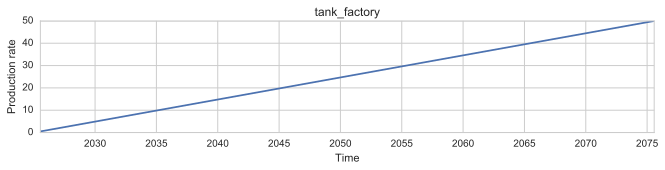

In [11]:
# tank_factory
dates = [start, end]
values = [0.5, 50]
timeserie = factory.interpolate_timeserie(dates, values, 'B')
factory.add_to_timeline(timeserie, 'earth', 'update', 'tank_factory', 'production', 'unit')

plt.figure(figsize=(11, 2))
plt.title('tank_factory')
plt.plot(timeserie['datetime'], timeserie['value'])
plt.ylabel('Production rate')
plt.xlabel('Time')
plt.show()

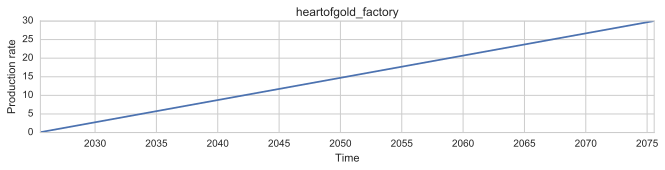

In [12]:
# heartofgold_factory
dates = [start, end]
values = [0.1, 30]
timeserie = factory.interpolate_timeserie(dates, values, 'B')
factory.add_to_timeline(timeserie, 'earth', 'update', 'heartofgold_factory', 'production', 'unit')

plt.figure(figsize=(11, 2))
plt.title('heartofgold_factory')
plt.plot(timeserie['datetime'], timeserie['value'])
plt.ylabel('Production rate')
plt.xlabel('Time')
plt.show()

In [13]:
# Create launch date for MARS - EARTH travels
openning_dates = pandas.date_range(start=datetime.datetime(2018, 4, 1, 0, 0, 0), end=end, freq='780D').tolist()
timeserie = pandas.DataFrame(data={'datetime': openning_dates, 'value': ['None'] * len(openning_dates)})
factory.add_to_timeline(timeserie, event='window_open')

In [14]:
# Save to Excel
factory.save()